In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

**НАБОР ДАННЫХ**

Набор данных содержит информацию о вариантах бронирования авиабилетов с веб-сайта Easemytrip для перелетов между 6 крупнейшими городами Индии. В очищенном наборе данных содержится 300261 точка данных и 11 объектов.

**Объекты:**

1) Airline: Название авиакомпании хранится в столбце авиакомпания. Это категориальный признак, включающий 6 различных авиакомпаний.

2) Flight: Рейс хранит информацию о коде рейса самолета. Это категориальный признак.

3) Source City: город, из которого вылетает рейс. Это категориальный признак, содержащий 6 уникальных городов.

4) Departure Time: Это производный категориальный признак, полученный путем группировки периодов времени в ячейки. Он хранит информацию о времени вылета и имеет 6 уникальных меток времени.

5) Stops: Категориальный признак с 3 различными значениями, который хранит количество остановок между городами отправления и назначения.

6) Arrival Time: Это производная категориальная функция, созданная путем группировки временных интервалов в ячейки. Она имеет шесть различных временных меток и хранит информацию о времени прибытия.

7) Destination City: город, где приземлится рейс. Это категориальная функция, имеющая 6 уникальных городов.

8) Class: Категориальный признак, содержащий информацию о классе сиденья; он имеет два различных значения: Бизнес и Эконом.

9) Duration: Непрерывный признак, отображающий общее количество времени, необходимое для поездки между городами в часах.

10))Days Left: Это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.

11) Price: Целевая переменная хранит информацию о цене билета.

In [2]:
df = pd.read_csv('/content/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.shape

(300153, 12)

In [5]:
df.describe(include = "all")

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<Axes: xlabel='price'>

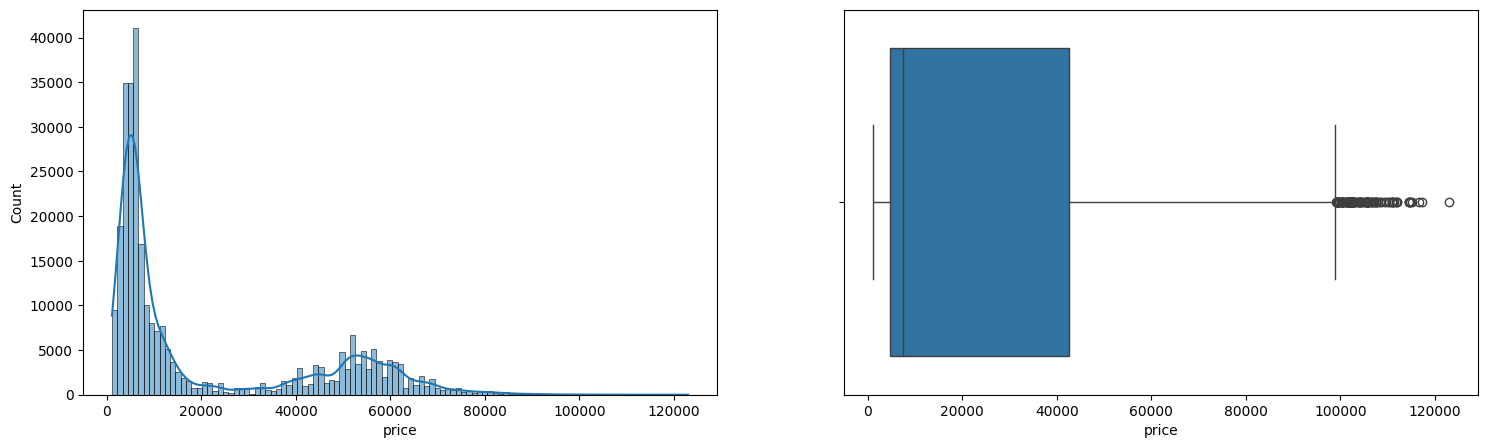

In [7]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = 'price', data = df)

Text(0.5, 1.0, 'Airline prices based on the class and company')

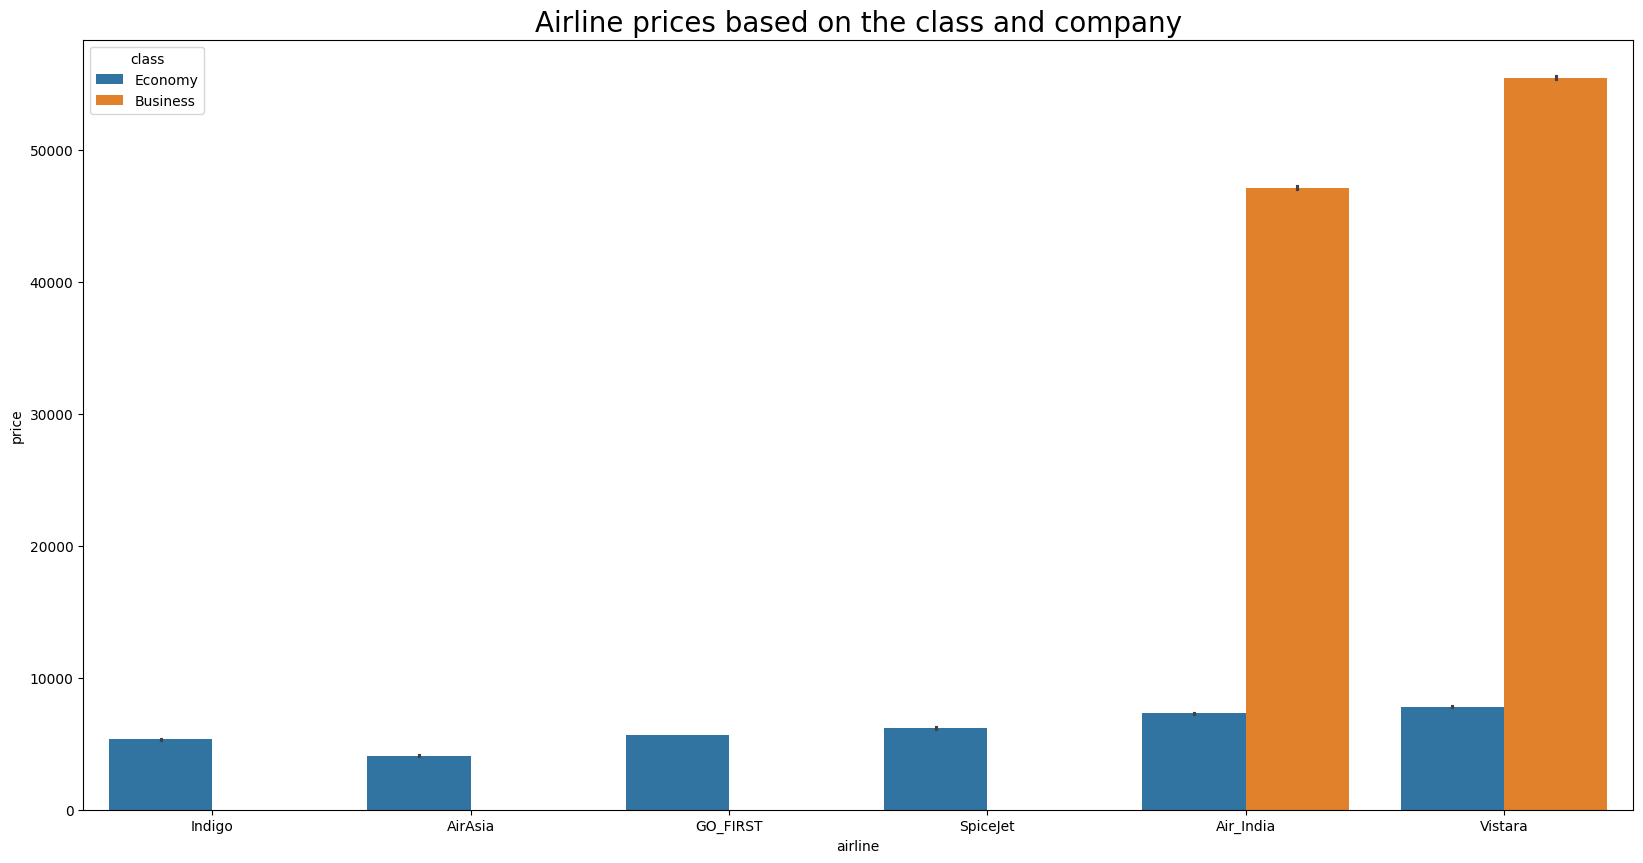

In [8]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

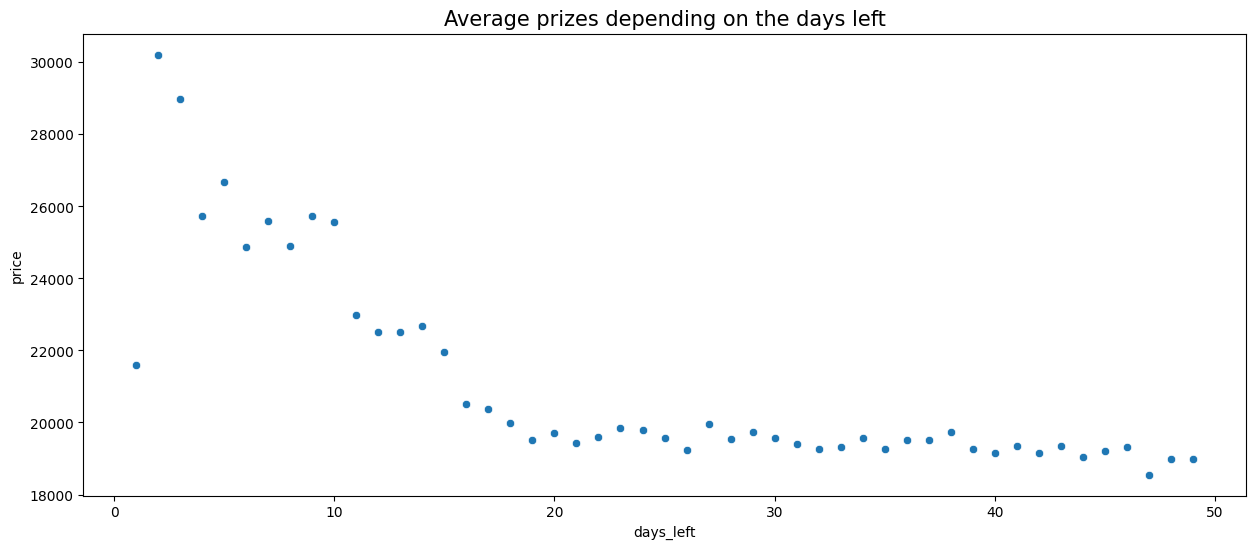

In [9]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

<Axes: xlabel='days_left', ylabel='price'>

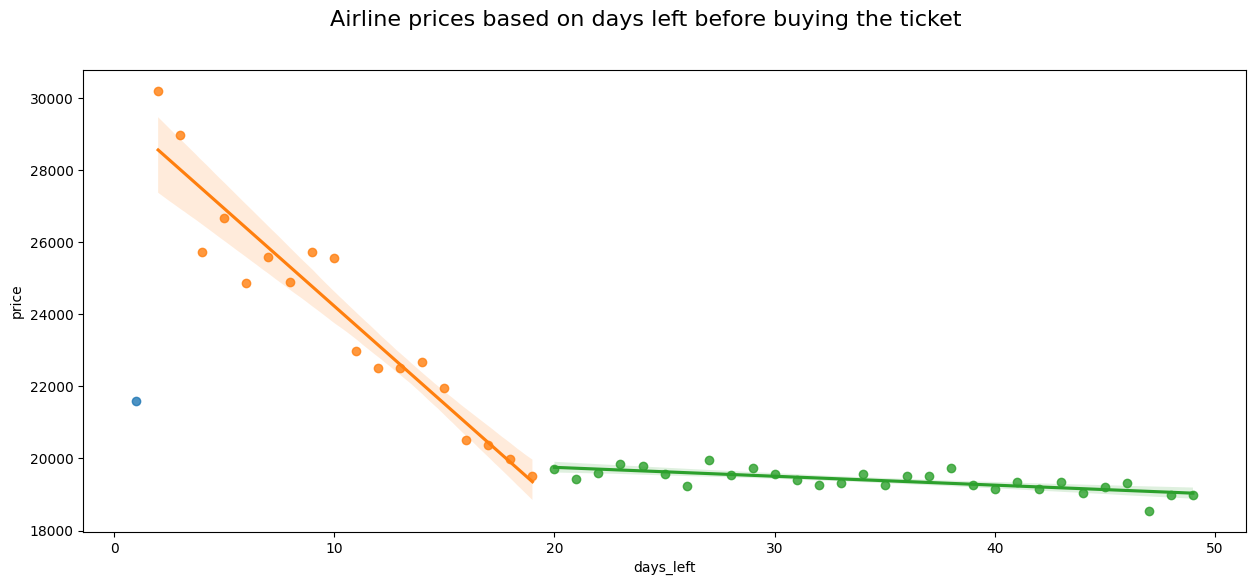

In [10]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

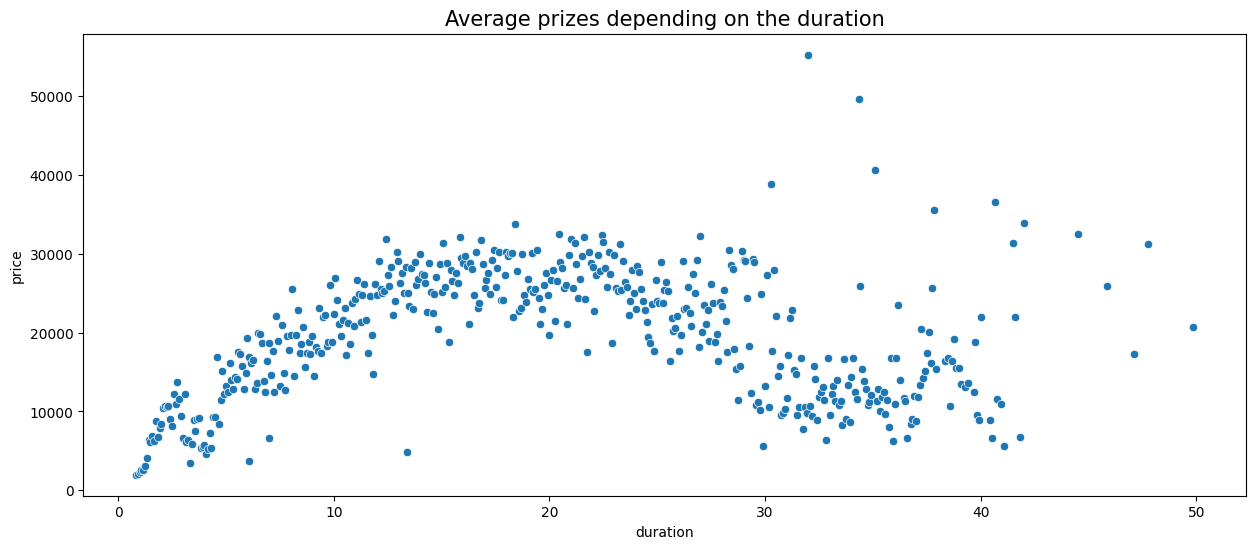

In [11]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)

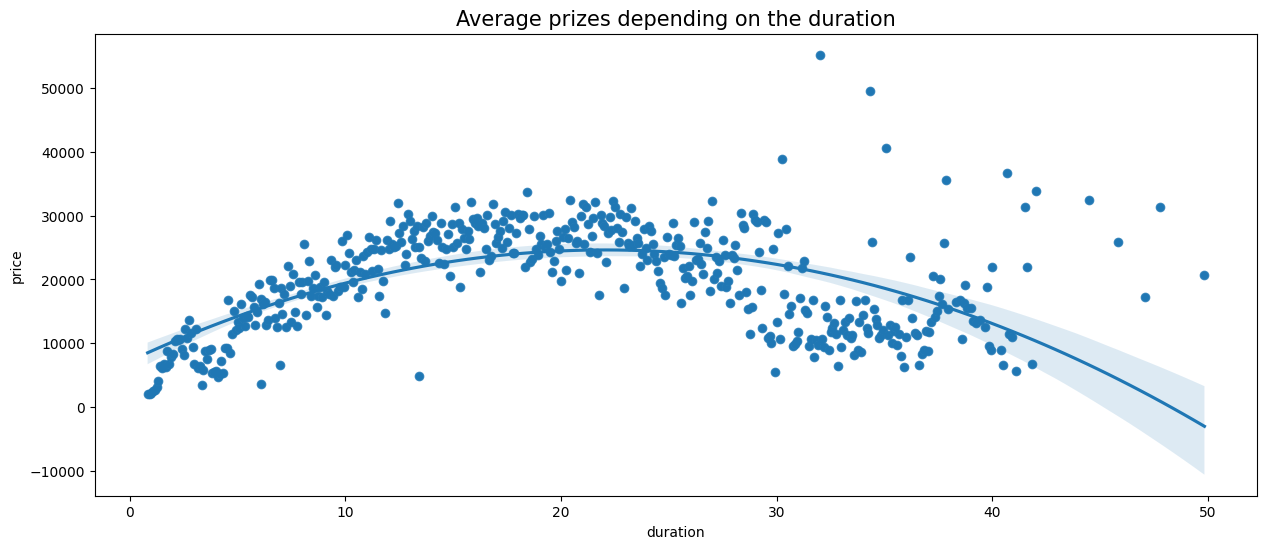

In [12]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

Text(0.5, 1.0, 'Airline prices based on the arrival time')

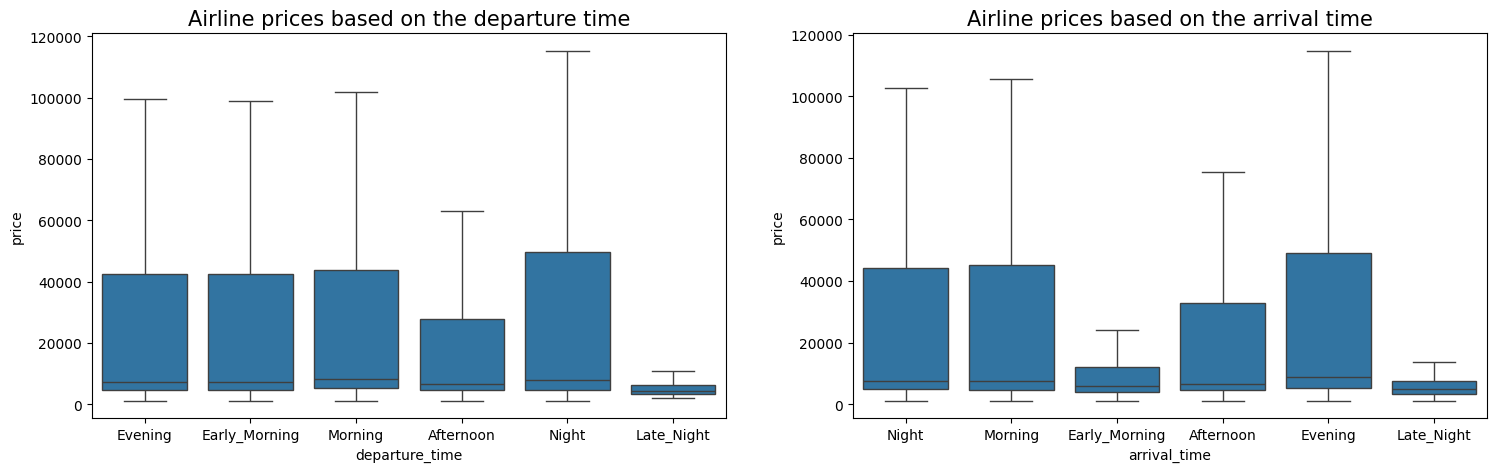

In [13]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

Text(0.5, 0.98, 'Airline prices based on the source and destination cities')

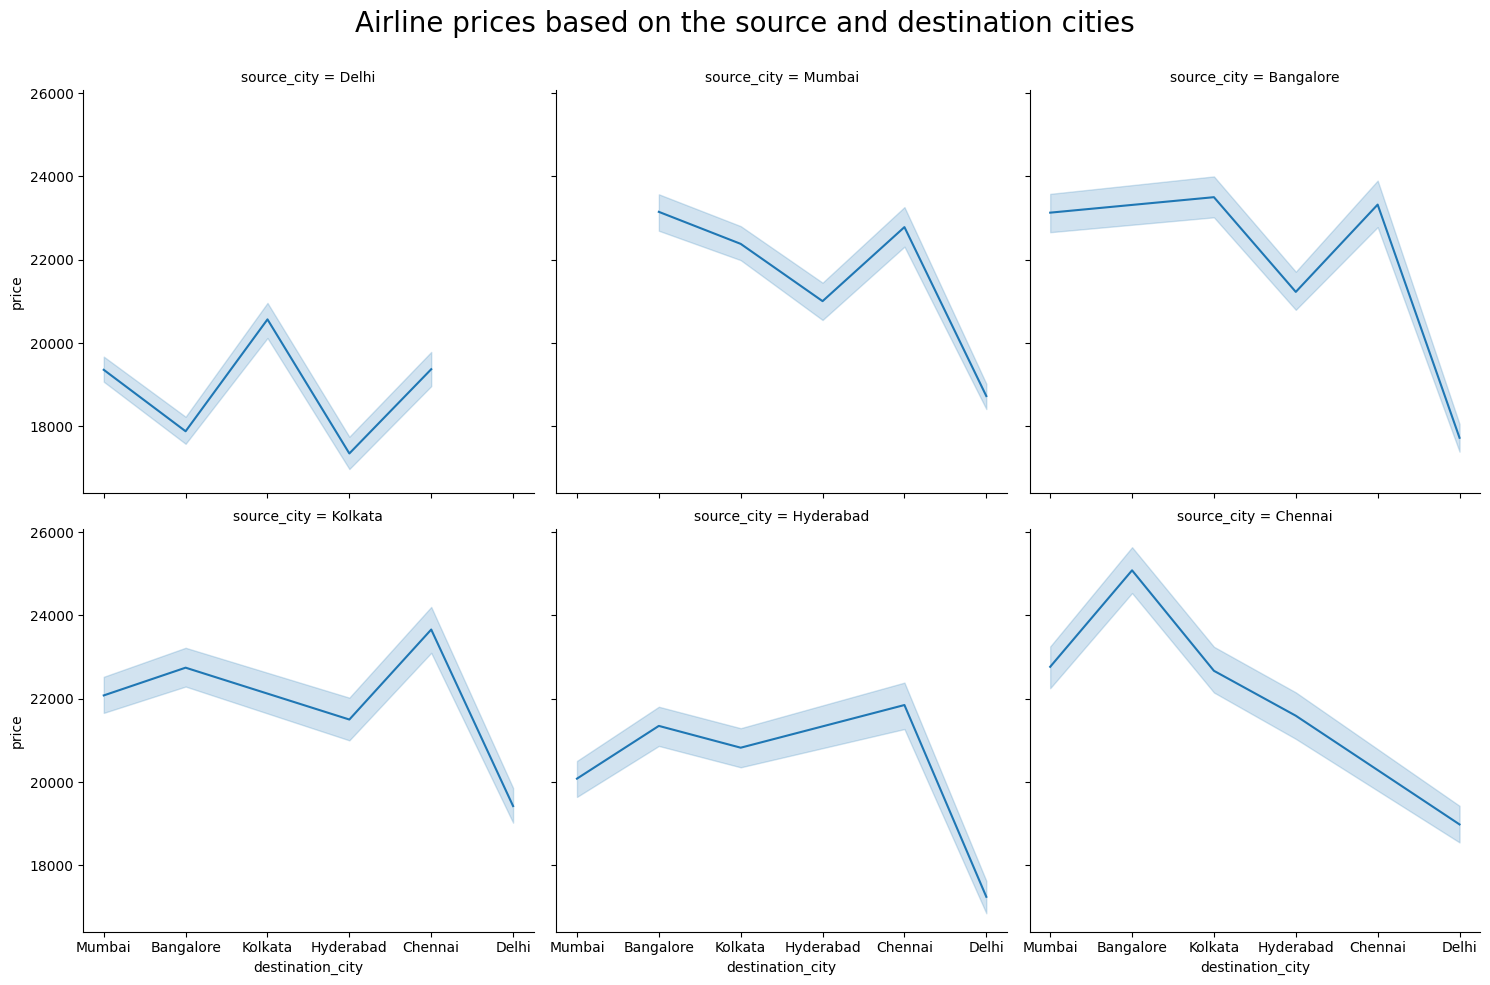

In [14]:
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df, col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('Airline prices based on the source and destination cities',fontsize=20)

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

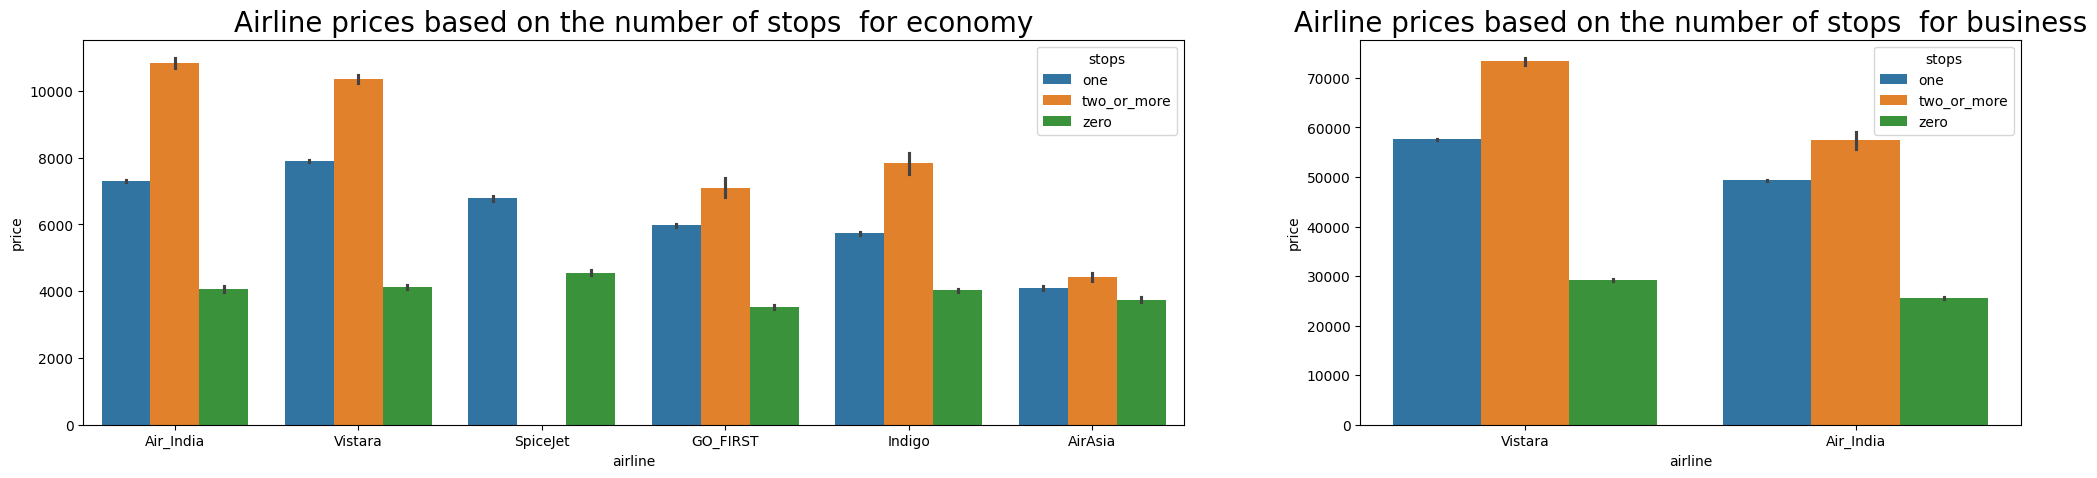

In [15]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

In [16]:
def preprocessing(df):

    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)

    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)

    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)

    return df

In [18]:
df_preprocessed = preprocessing(df)
df_preprocessed

,Unnamed: 0,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,2.17,1,5953,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,2.33,1,5953,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,2,0,0,2.17,1,5956,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0,0,2.25,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0,0,2.33,1,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,1,1,10.08,49,69265,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
300149,300149,1,1,10.42,49,77105,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,300150,1,1,13.83,49,79099,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
300151,300151,1,1,10.00,49,81585,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


<Axes: >

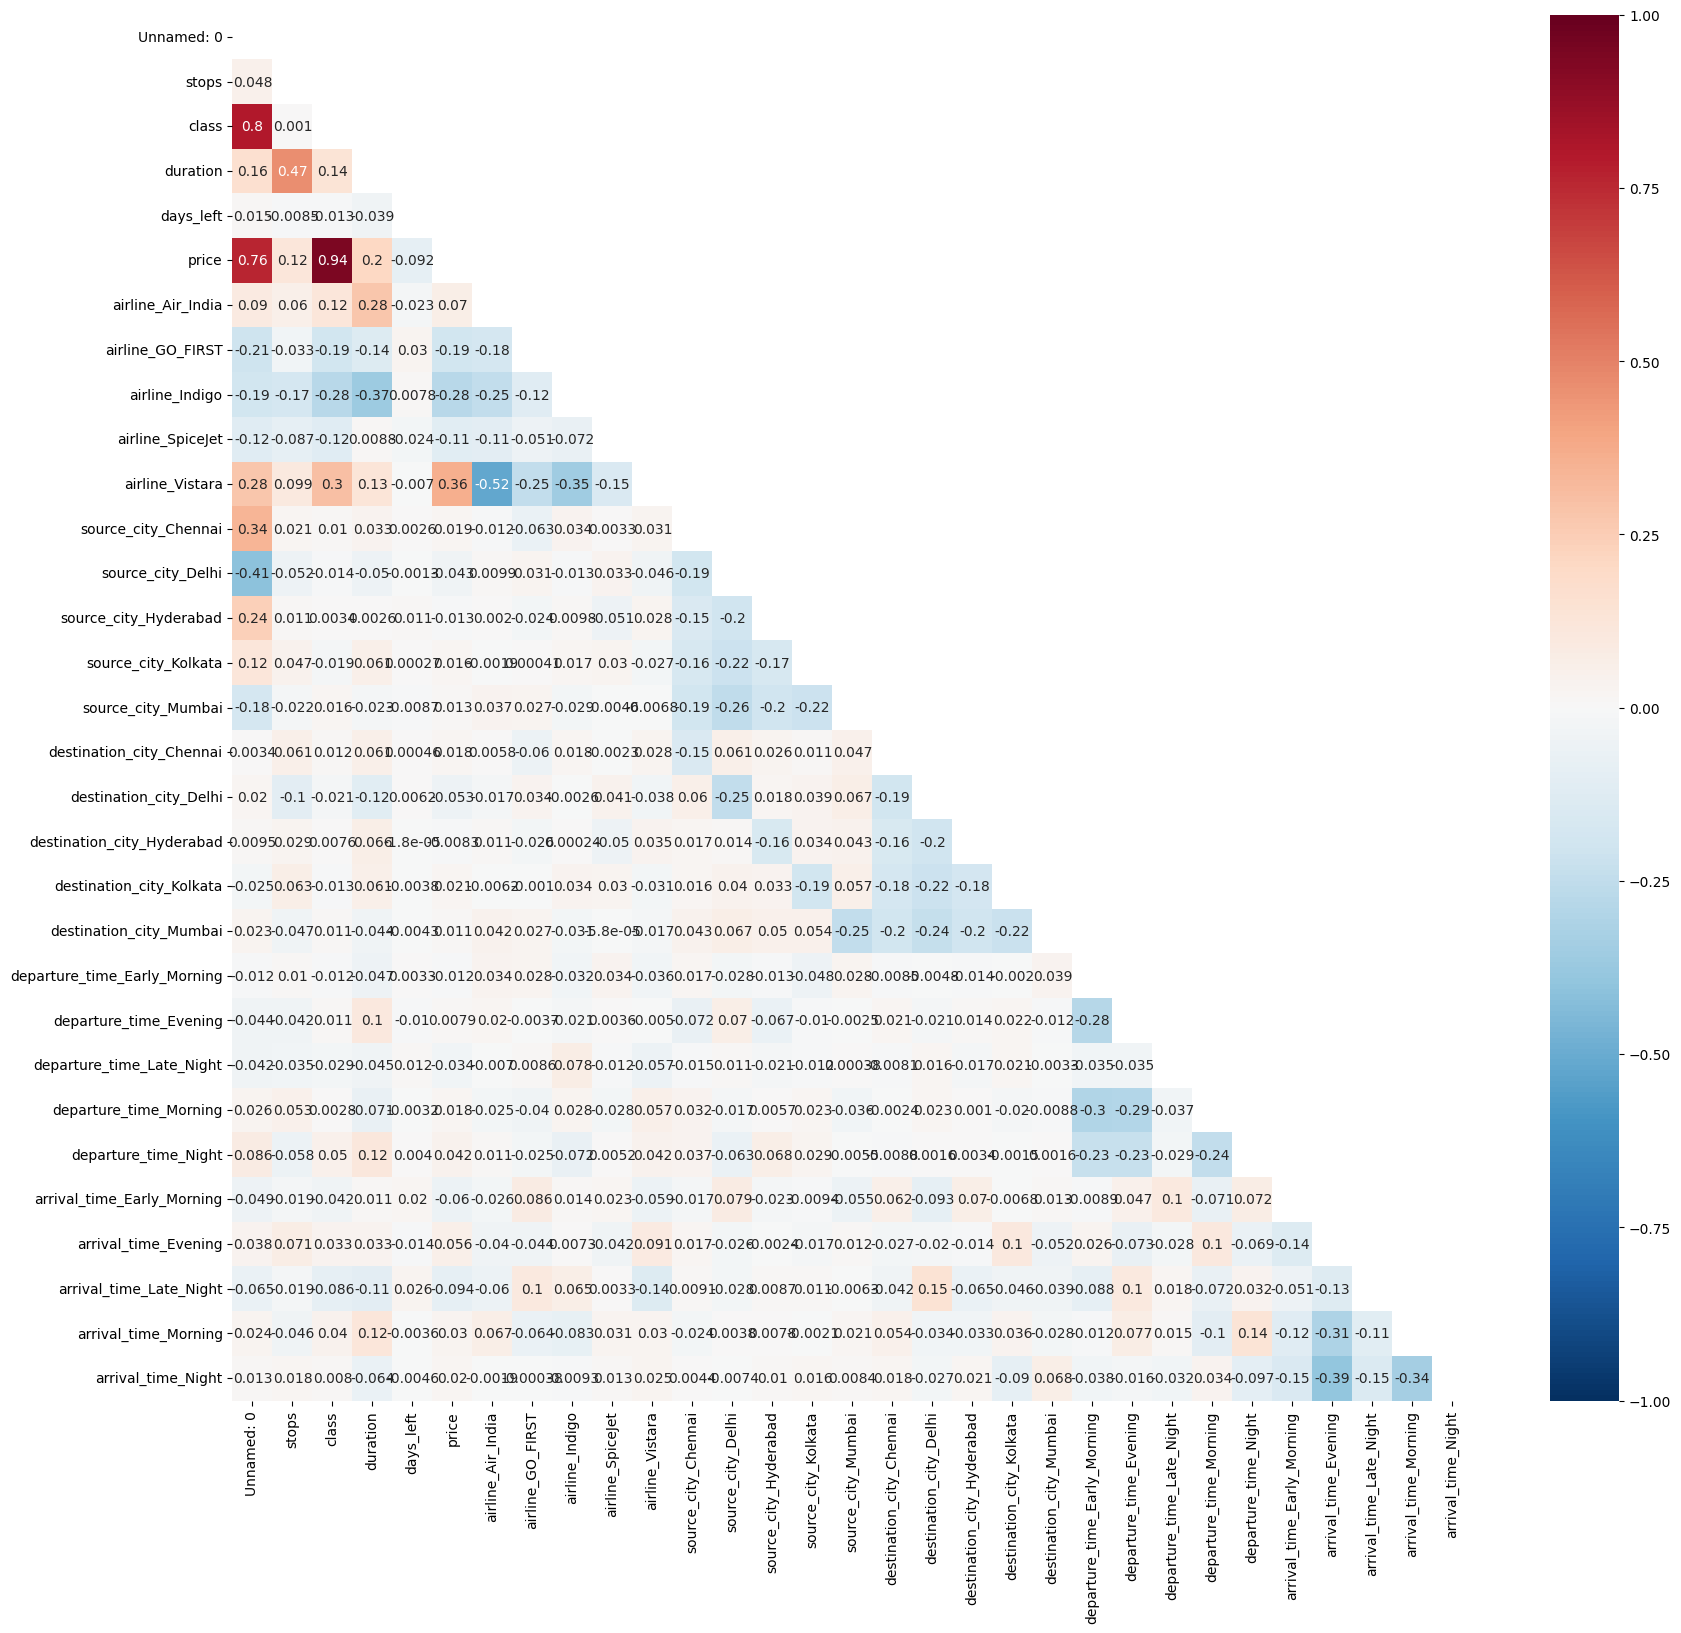

In [19]:
mask = np.triu(np.ones_like(df_preprocessed.corr(), dtype=bool))
plt.figure(figsize=(20, 18))
sns.heatmap(df_preprocessed.corr(), mask=mask, annot=True, vmin=-1.0, vmax=1.0, center=0, cmap='RdBu_r')

In [20]:
df_preprocessed.to_csv('flight_price.csv', index=False)